In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.6.0


In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images, test_labels)=fashion_mnist.load_data()

In [9]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
            'Sandal','Shirt','Sneaker','Bag','Ankle Boot'] 
len(class_names)

10

In [11]:
train_images[0].shape

In [6]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [13]:
test_images.shape

In [ ]:
print(test_labels)

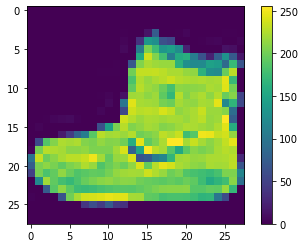

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images=train_images/255
test_images=test_images/255

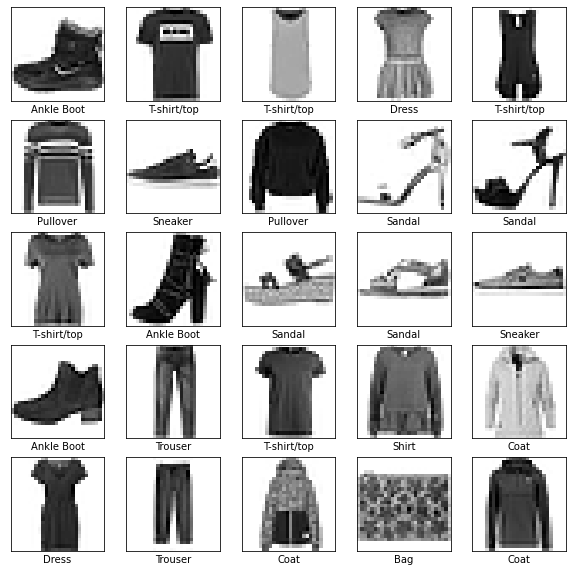

In [13]:
plt.figure(figsize=(10,10))

a=[1,2,3,4]
j=[]    
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    j=class_names[train_labels[i]]
    
    
    plt.xlabel(j)
plt.show()

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [ ]:
model.fit(train_images,train_labels,epochs=10)

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)


In [ ]:
predictions=model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
plt.matshow(test_images[3])

In [ ]:
c=np.argmax(predictions[3])
class_names[c]

In [ ]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
def plot_value_array(i,predictions_array,true_labels):
    predictions_array,true_label=predictions_array[i],true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="red")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    


In [ ]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

In [ ]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(1):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
    plt.show()

In [3]:
import cv2 as cv
IMG_PATH="Pictures/SurajAleBirthday2.jpg."

In [ ]:
ImgArray=cv.imread(IMG_PATH)
window_name='image'
cv.imshow(window_name,ImgArray)
cv.waitKey(0)


In [ ]:
convertedArray=cv.cvtColor(ImgArray,cv.COLOR_BGR2RGB)
plt.subplots(15,10)
plt.imshow(convertedArray)
plt.show()